### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。
* 將解盤程序獨立成函式，放在[StockScreener.py](https://github.com/yilintung/StockInvestmentNotebook/blob/main/mysys/StockScreener.py)中。
* [修改](https://github.com/yilintung/StockInvestmentNotebook/commit/83284fbaf4b287f15ffbfdb5c8ca8df940cf5a18)解盤程序， 用以調整底部型態識別結果之文字描述。

* 引入模組與定義公用函式  

In [ ]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [ ]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [ ]:
mysys.UpdatestockDatabase()

* 選股程序驗證  

In [ ]:
results = mysys.StockScreener.StockScreener()

In [ ]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

* 建立「解盤」物件    

In [ ]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

In [ ]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

In [ ]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

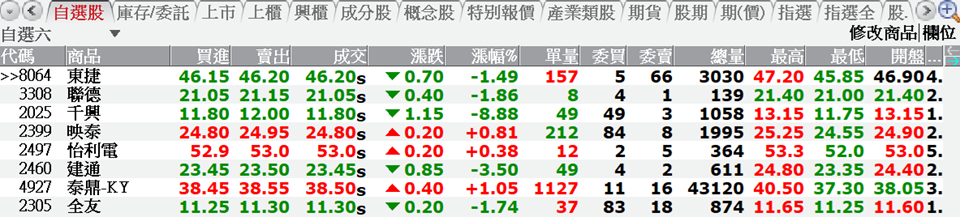  

* 聯電(2303)  
  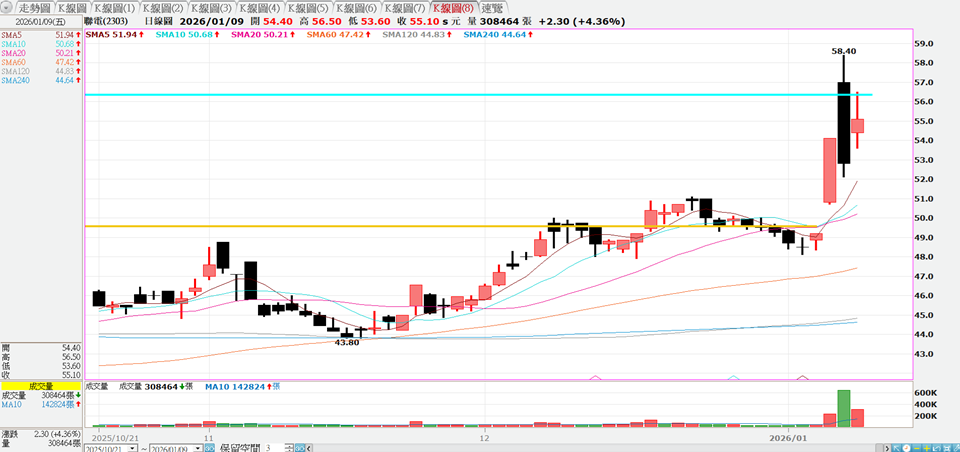  
* 元晶(6443)  
  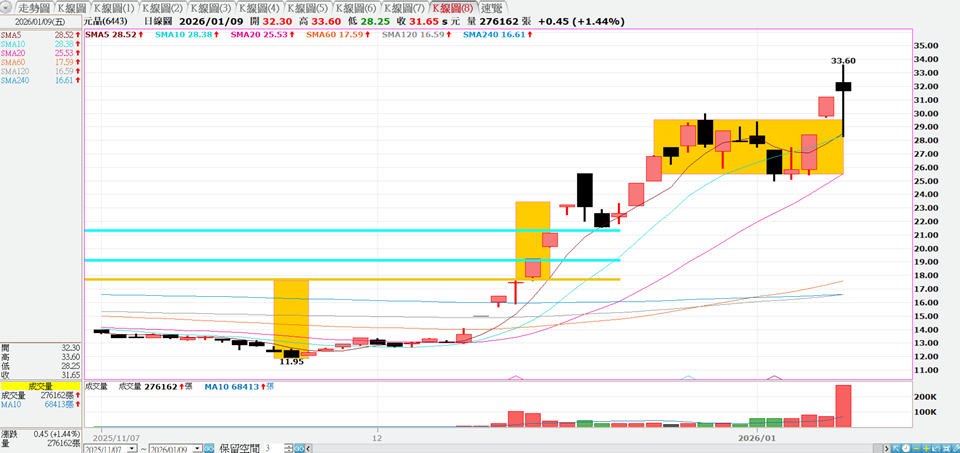  
* 泰鼎-KY(4927)  
  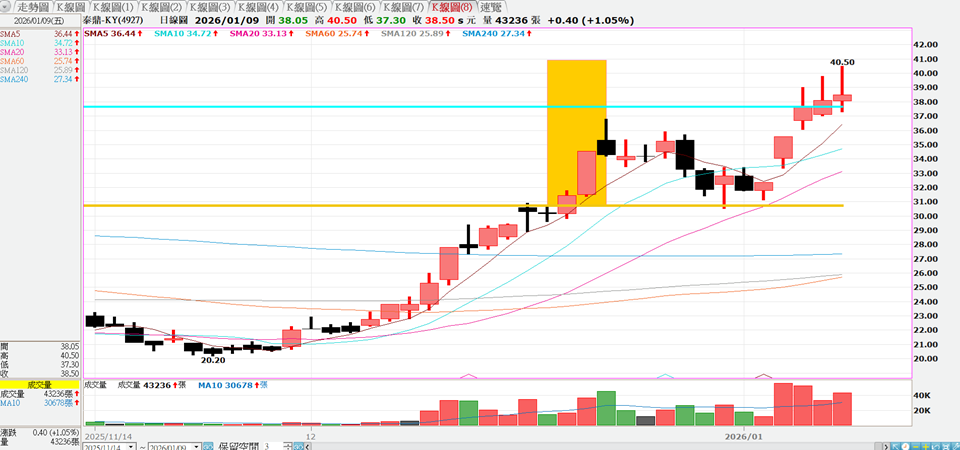  
* 力積電(6770)  
  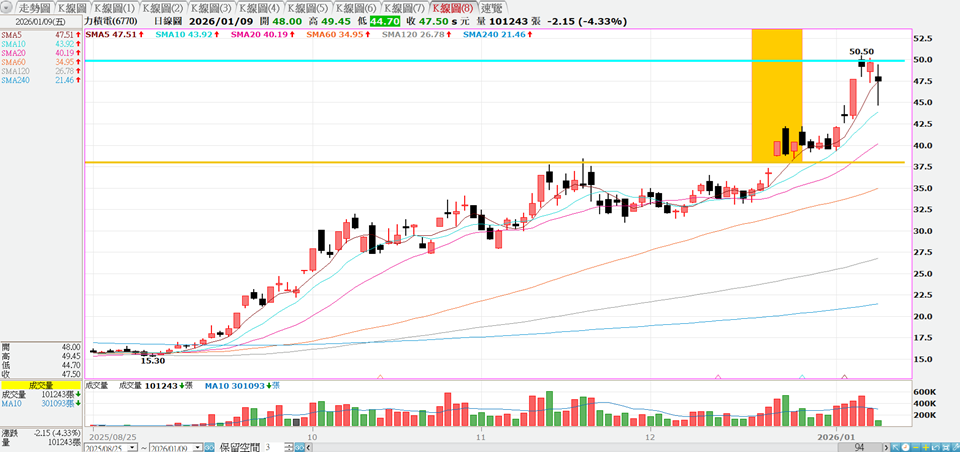  
* 元大金(2885)  
  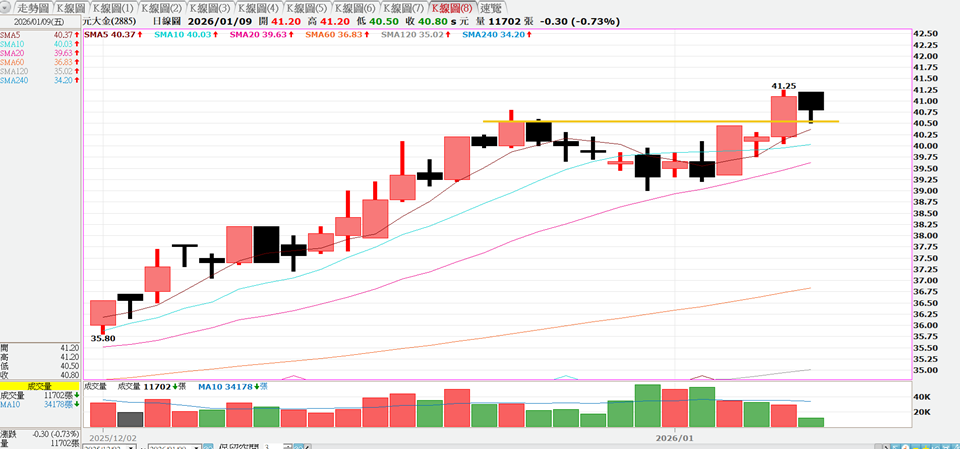  
* 益得(6461)  
  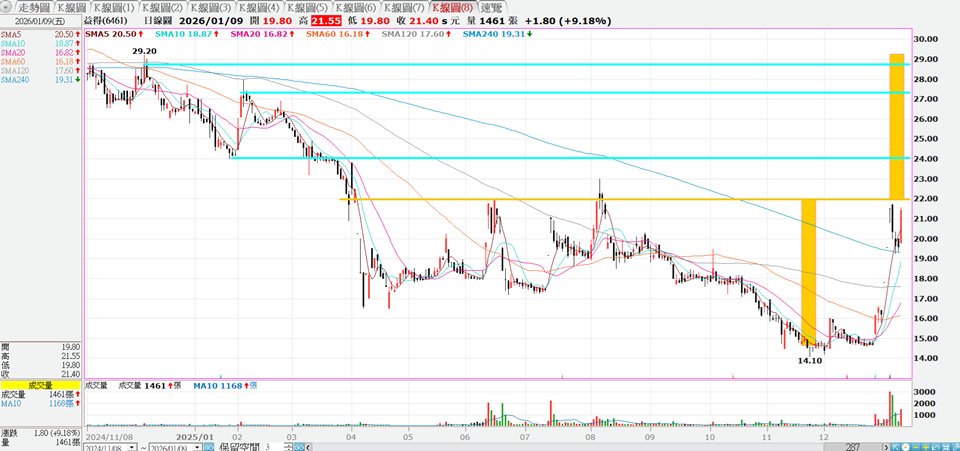  
* 長園科(8038)  
  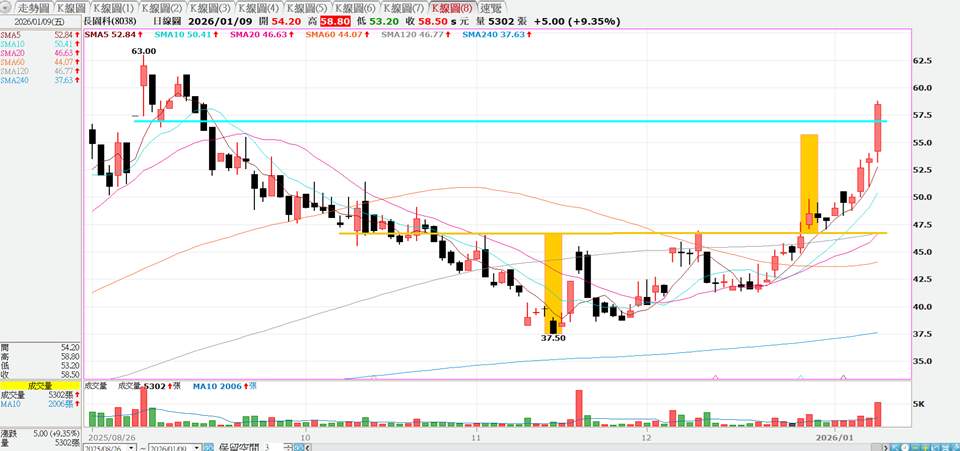  
* 東捷(8064)  
  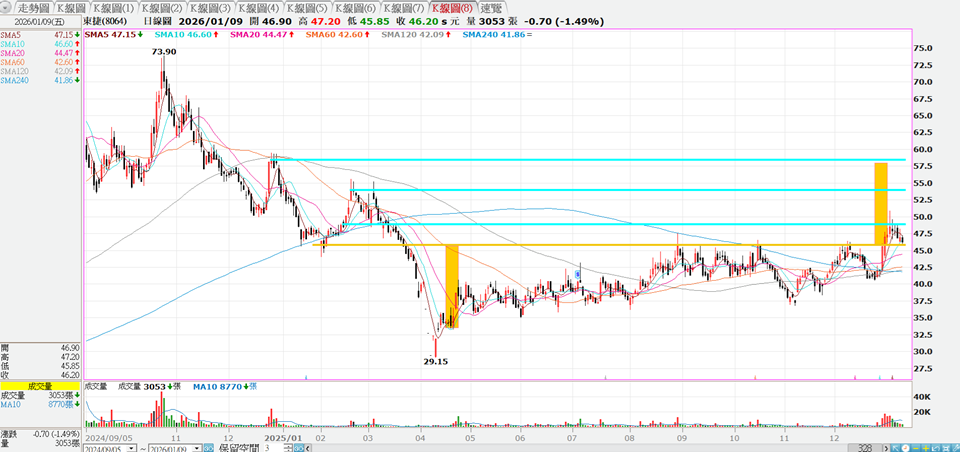  

### 個股解盤  

* 千興(2025)  
  看法：下跌至滿足區附近，這檔追蹤至今日。  

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'2025',buttom_pattern = True)

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-10-15'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-12-02']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-21'
    bottom_price = range_prices.loc['2025-11-21']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-02'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('2025','2025-08-28','2026-01-08',line_drawing_callback)
display(image)

籌碼面：  
法人小買(+55)：外資小買(+75)、投信中立(0)、自營小賣(-20)。  
主力小賣(-227)。  
分公司買賣家數差分散(-73)。  
融資中立(0)、融券中立(0)。  